## 개요
01_1_공간데이터_tutorial에서 배운 내용을 되새겨 보면서, 좀 더 확장된 내용도 다뤄보겠습니다.

---

## 사용할 패키지 준비

shp을 사용할 때 이용하는 패키지명을 정확하게 입력하여 주십시오.

In [2]:
# import 패키지명 (as 별칭) 
import g**p**d** as gpd

c:\Users\dhl\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


https://datascienceschool.net/01%20python/02.13%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80%20%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0.html

---

## 사용할 데이터 준비
이번엔 VW-LAB을 운영하시는 김승범 님의 Github 저장소의 행정동 경계 geojson 파일을 이용해 보겠습니다.   
https://www.vw-lab.com/   
https://github.com/vuski/admdongkor   
공공데이터를 제공하는 NSDI, 국토정보플랫폼, 공공데이터포털 등에서도 geojson을 제공해 주시면 훨씬 더 활용도가 높아질 것입니다. 

In [20]:
shp_path = 'https://github.com/vuski/admdongkor/raw/master/ver20220701/HangJeongDong_ver20220701.geojson'
dong_gdf = gpd.****_****(shp_path)  

In [7]:
# Pandas 데이터프레임 또는 GeoPandas GEoDataFrame의 기본 정보를 조회해보는 기능은 무엇일까요?
dong_gdf.****()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3513 entries, 0 to 3512
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  3513 non-null   int64   
 1   adm_nm    3513 non-null   object  
 2   adm_cd    3513 non-null   object  
 3   adm_cd2   3513 non-null   object  
 4   sgg       3513 non-null   object  
 5   sido      3513 non-null   object  
 6   sidonm    3513 non-null   object  
 7   sggnm     3513 non-null   object  
 8   adm_cd8   3513 non-null   object  
 9   geometry  3513 non-null   geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 274.6+ KB


In [8]:
# Pandas 데이터프레임 또는 GeoPandas GEoDataFrame의 처음 다섯 행의 정보를 조회해보는 기능은 무엇일까요?
dong_gdf.****()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


In [9]:
# 무조건 맨 처음 다섯 행만 볼 수 있나요? 
dong_gdf.head(2)

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."


In [10]:
# 마지막에서 원하는 수의 행에 해당하는 정보도 볼 수 있습니다. 
dong_gdf.tail(2)

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
3511,3456,세종특별자치시 세종시 반곡동,2901075,3611055600,36110,36,세종특별자치시,세종시,29010513,"MULTIPOLYGON (((127.29641 36.54349, 127.30004 ..."
3512,3492,세종특별자치시 세종시 새롬동,2901073,3611051500,36110,36,세종특별자치시,세종시,29010511,"MULTIPOLYGON (((127.23907 36.48808, 127.24342 ..."


geopandas는 이름에서부터 pandas 패키지를 기반으로 하고 있는 것을 알 수 있고, pandas의 함수(기능)와 매우 유사합니다.   
따라서, 공간 분석/시각화 위주로 작업을 한다고 해도 pandas의 기능을 필요로 할 경우가 많기 때문에   
pandas의 주요 기능을 알아두면 좋습니다.   
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf  

## 지도 시각화

<AxesSubplot:>

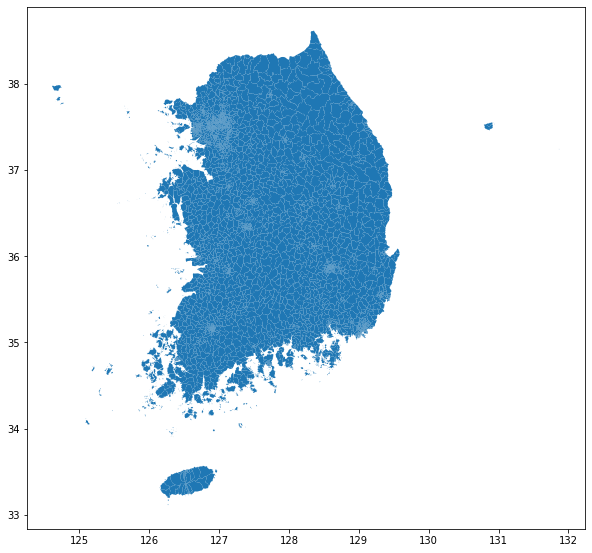

In [12]:
dong_gdf.****(figsize=(10,10))

X와 Y 좌표축의 숫자는 무슨 단위인까요?   
행정읍면동경계 데이터의 좌표계는 무엇입니까?

In [13]:
dong_gdf.***

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

EPSG:4326은 WGS84 위도, 경도 좌표계로 GPS 측량시 기본적으로 획득되는 좌표입니다.      
https://epsg.io/4326

---

위의 지도를 시도별로 각각 다른 색으로 표시해볼 수 있을까요?

c:\Users\dhl\AppData\Local\Programs\Python\Python38\lib\site-packages\geopandas\plotting.py:642: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


<AxesSubplot:>

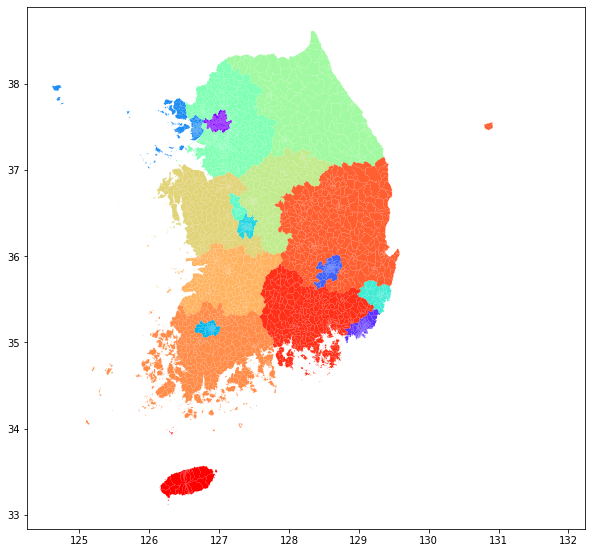

In [18]:
dong_gdf.plot('sido',categorical=True, colormap='rainbow', figsize=(10,10))  

위의 컬러맵은 어떤 것들이 있을까요?  
https://matplotlib.org/stable/tutorials/colors/colormaps.html 

### 수고 많으셨습니다!!! 